# Distribution of empty runs in NYC

In [1]:
import setup

In [2]:
def district_amounts(df, direction):
    er_amount, full_amount, result = df.loc[df['passenger_count'] == 0][direction].value_counts(), df[direction].value_counts(), []
    district_mapping = {
        'bronx': 'er_amount_bronx',
        'brooklyn': 'er_amount_brooklyn',
        'manhattan': 'er_amount_manhattan',
        'queens': 'er_amount_queens',
        'staten_island': 'er_amount_staten_island'
    }

    for district, key in district_mapping.items():
        district_values = setup.districts.get(district, [])
        result.append(er_amount.reindex(district_values).fillna(0).sum() / full_amount.reindex(district_values).fillna(0).sum())
    
    return result

 
def sum_up(year):
    return setup.np.sum(year, axis=0)


def er_district_amounts_percentages(array):
    return [item / sum(array) * 100 for item in array]


def pu_do_manhattan(month, location_column):
    full_amount = month.loc[month[location_column].isin(setup.districts['manhattan'])][location_column].value_counts()
    er_amount = month.loc[(month[location_column].isin(setup.districts['manhattan'])) & (month['passenger_count'] == 0)][location_column].value_counts()
    return er_amount / full_amount


def percentage(month):
    return month / month.sum() * 100


def center(center):
    return [center.loc[(center >= category) & (center < category + 1)].keys().tolist() for category in range(5)]


def result_districts(er_percentages, er_year, title):
    print('-------------------- year average --------------------')
    print(er_percentages, '\n\n')
    
    for index in range(12):
        month_percentages = er_district_amounts_percentages(er_year[index])
        print('--------------------', setup.month_labels[index], '--------------------')
        print(month_percentages, '\n')

    fig = setup.plt.figure(figsize=(10, 10))
    setup.plt.title(title)
    setup.plt.pie(er_percentages, colors=setup.district_colors)
    setup.plt.legend(setup.district_labels, loc=3)
    setup.plt.show()


def result_manhattan(manhattan):
    for index in range(5):
        print('---------- Category', index, '----------')
        print(center(manhattan / 12)[index], '\n')

# PULocationID
#### Distribution of empty run starts per district of New York City

-------------------- year average --------------------
[26.237148406987505, 19.22651537077372, 19.05349904108659, 20.69428812169113, 14.788549059461062] 


-------------------- January --------------------
[40.21668884708987, 17.488139750800194, 17.075639946352528, 15.858947007601829, 9.36058444815558] 

-------------------- February --------------------
[32.86483947407959, 15.789951873538307, 13.382459356253475, 13.545149750238217, 24.41759954589042] 

-------------------- March --------------------
[31.332937814770318, 18.426043488472292, 16.617041283946687, 17.15393631640436, 16.47004109640634] 

-------------------- April --------------------
[36.821829990325945, 20.10272329707324, 21.18436987163264, 21.891076840968175, 0.0] 

-------------------- May --------------------
[29.948617187372236, 19.418542989857258, 19.925043574226276, 21.94154107495089, 8.766255173593343] 

-------------------- June --------------------
[22.024564197528846, 21.114801280495353, 22.108231021745564, 24.5

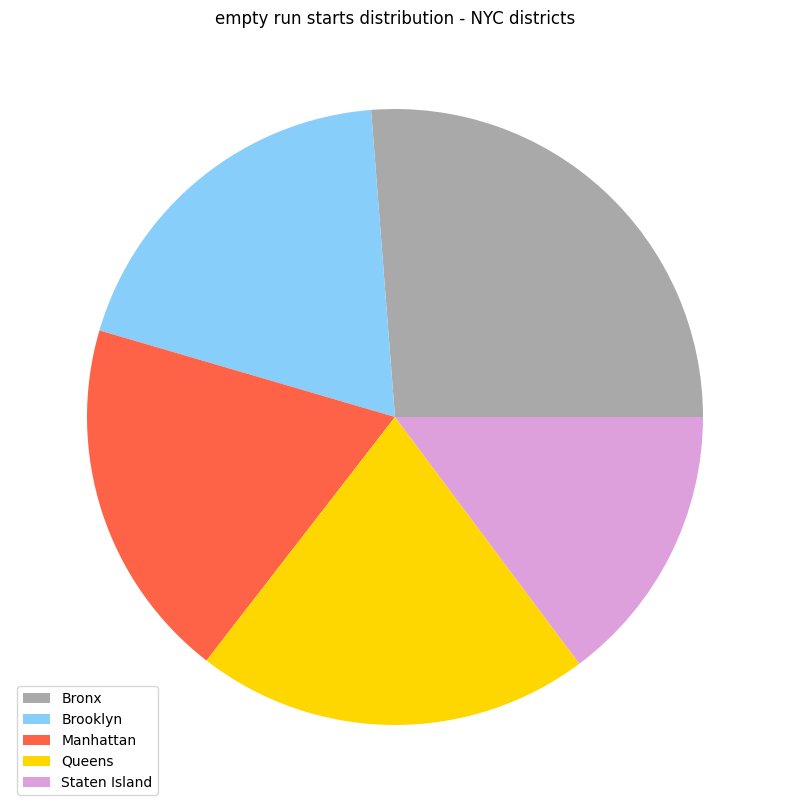

In [3]:
er_year_amounts = [district_amounts(month, 'PULocationID') for month in setup.year]
result_districts(er_district_amounts_percentages(sum_up(er_year_amounts)), er_year_amounts, 'empty run starts distribution - NYC districts')

#### Distribution of empty runs with the start in Manhattan

In [4]:
result_manhattan(sum([percentage(pu_do_manhattan(month, 'PULocationID')) for month in setup.year]))

---------- Category 0 ----------
[] 

---------- Category 1 ----------
[4, 12, 13, 24, 41, 43, 45, 48, 50, 68, 74, 75, 79, 87, 88, 90, 100, 107, 113, 114, 116, 125, 127, 137, 140, 141, 142, 143, 144, 148, 151, 152, 158, 161, 162, 163, 164, 166, 170, 186, 202, 209, 211, 224, 229, 230, 231, 232, 233, 234, 236, 237, 238, 239, 243, 244, 246, 249, 261, 262, 263] 

---------- Category 2 ----------
[42, 194] 

---------- Category 3 ----------
[] 

---------- Category 4 ----------
[] 



![](../assets/empty_pu.jpg?raw=true)

# DOLocationID
#### Distribution of empty run ends per district of New York City

-------------------- year average --------------------
[20.37525262850326, 19.688458606194086, 21.62326643499808, 22.18494065550745, 16.128081674797123] 


-------------------- January --------------------
[23.808740196740967, 19.27869042635162, 21.800915203295204, 22.045735259724644, 13.06591891388757] 

-------------------- February --------------------
[21.82617218596014, 19.205467237305957, 20.68052891537906, 21.573475912843133, 16.714355748511718] 

-------------------- March --------------------
[22.03869479155958, 19.126816731821734, 20.526924324728416, 21.1906017317047, 17.116962420185576] 

-------------------- April --------------------
[21.78650891358623, 18.922966463934518, 21.22924481190522, 22.555176435901622, 15.506103374672406] 

-------------------- May --------------------
[19.666532576107016, 17.91598890790227, 20.546345438977692, 21.418757022591308, 20.452376054421713] 

-------------------- June --------------------
[19.166725257839865, 19.830092129766978, 22.59001

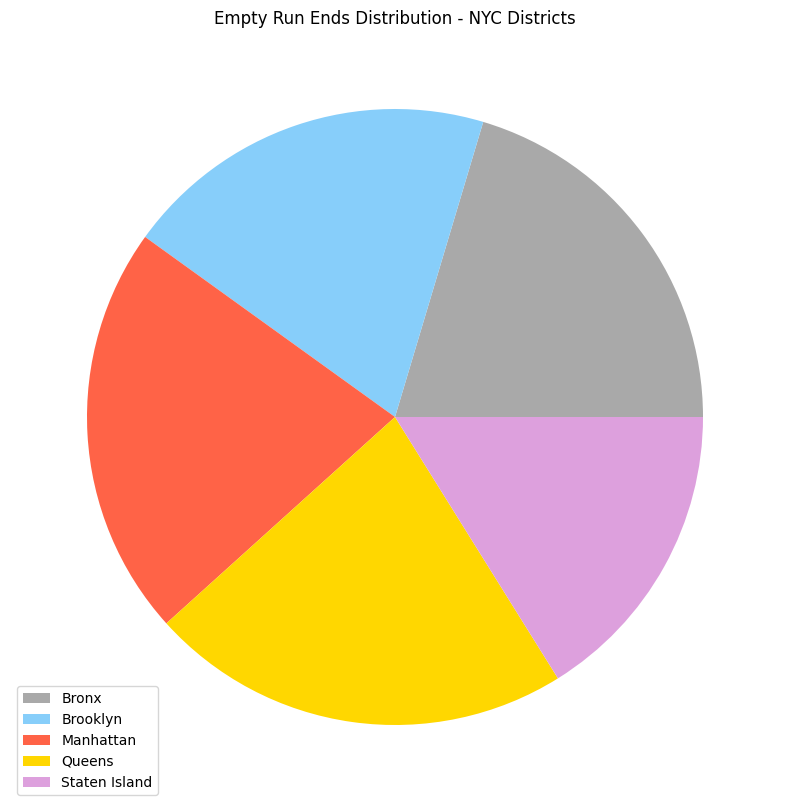

In [5]:
er_year_amounts = [district_amounts(month, 'DOLocationID') for month in setup.year]
result_districts(er_district_amounts_percentages(sum_up(er_year_amounts)), er_year_amounts, 'Empty Run Ends Distribution - NYC Districts')

#### Distribution of empty runs with the end in Manhattan

In [6]:
result_manhattan(sum([percentage(pu_do_manhattan(month, 'DOLocationID')) for month in setup.year]))

---------- Category 0 ----------
[] 

---------- Category 1 ----------
[4, 12, 13, 24, 41, 42, 43, 45, 48, 50, 68, 74, 75, 79, 87, 88, 90, 100, 107, 113, 114, 116, 120, 125, 127, 128, 137, 140, 141, 142, 143, 144, 148, 151, 152, 158, 161, 162, 163, 164, 166, 170, 186, 194, 202, 209, 211, 224, 229, 230, 231, 232, 233, 234, 236, 237, 238, 239, 243, 244, 246, 249, 261, 262, 263] 

---------- Category 2 ----------
[] 

---------- Category 3 ----------
[] 

---------- Category 4 ----------
[] 



![](../assets/empty_do.jpg?raw=true)